# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Install spacy and download the language model
%pip install spacy
import spacy
!python -m spacy download en_core_web_sm
language_model = spacy.load("en_core_web_sm")

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------- ------------------ 6.8/12.8 MB 38.1 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 42.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Problem 1 and example: common words in the Michigan subreddit

In [3]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [4]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [5]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [6]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [7]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [8]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [9]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [10]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [11]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

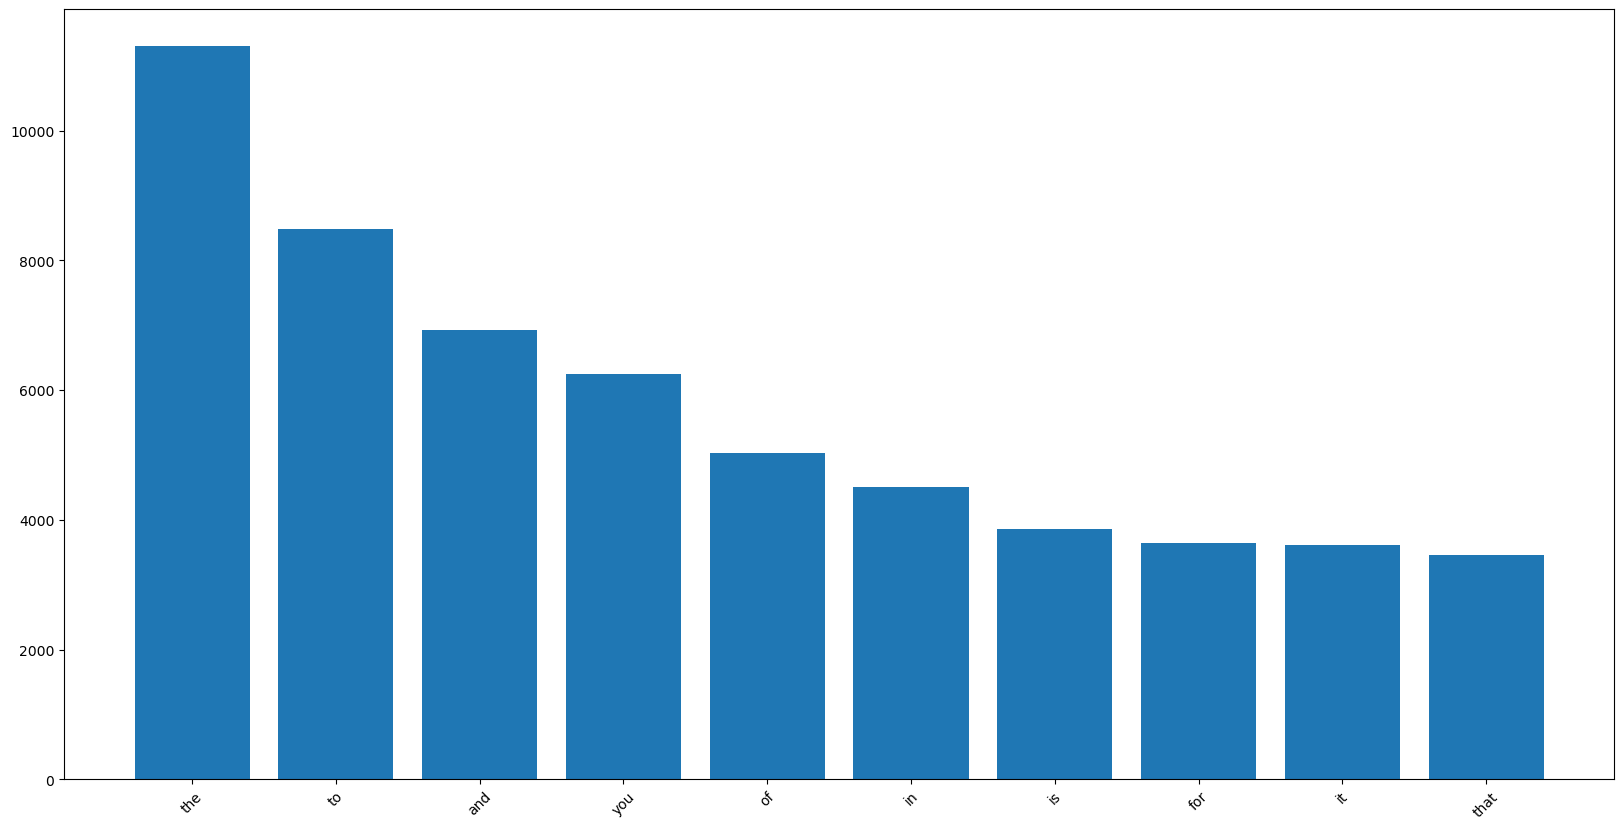

In [13]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: The words in these plots are words that are generally common in ALL written English. They include articles like "the," propositions like "of," and conjunctions like "and." As a result they're not particularly descriptive of what this community specifically is interested in and talking about. These words are necessary for the structure of language, but give us little idea about the topics being discussed.

#### Lemmatization and stopword removal

In [14]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [15]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [16]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [17]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [18]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [19]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

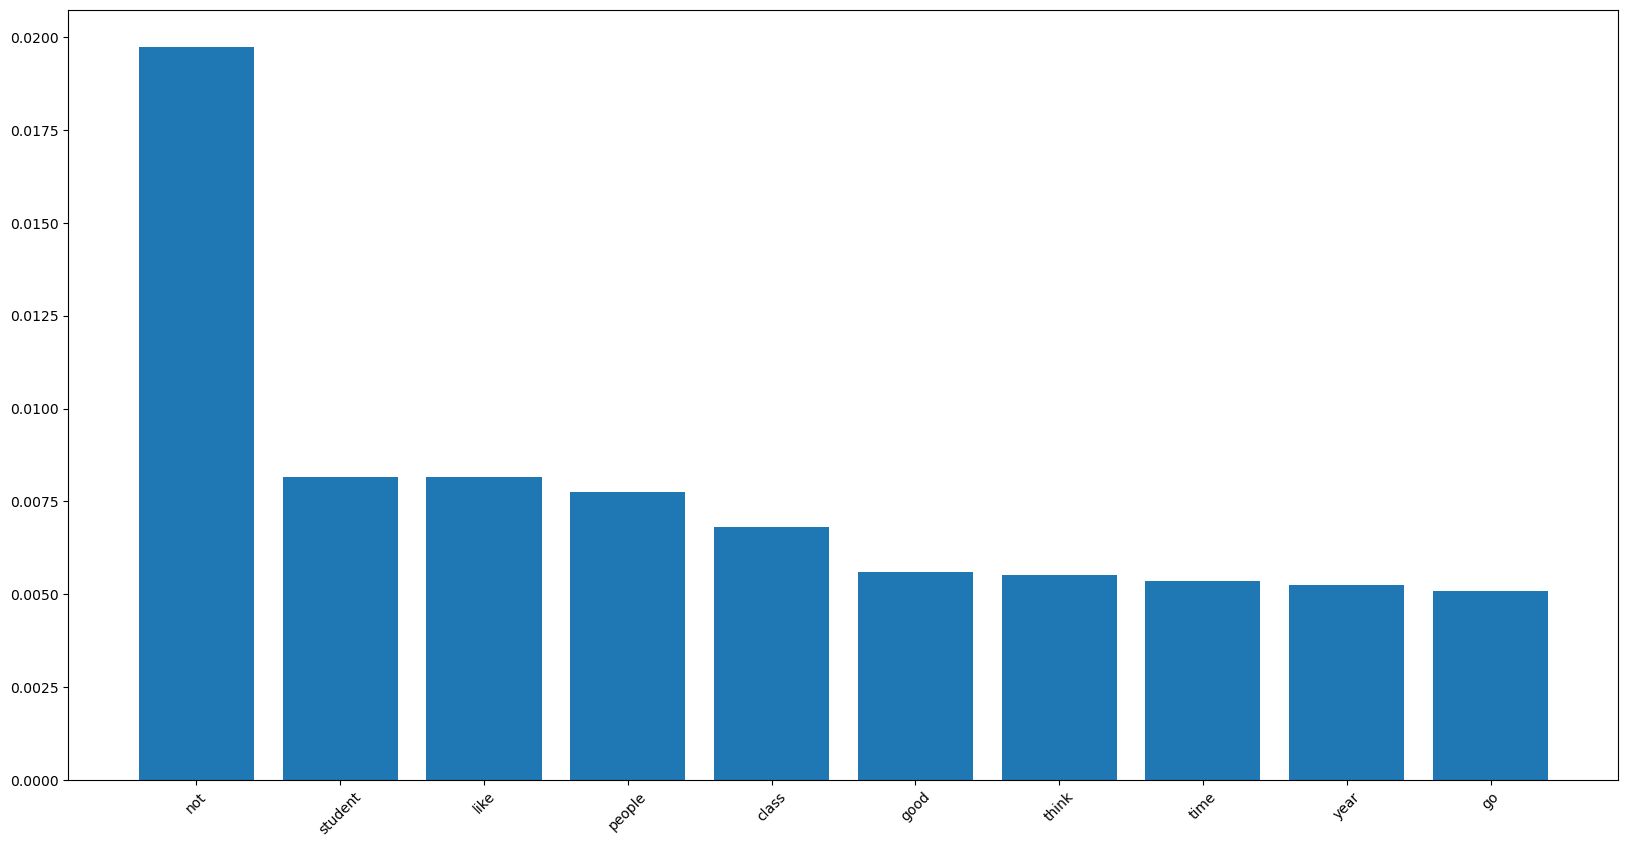

In [20]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [21]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [22]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

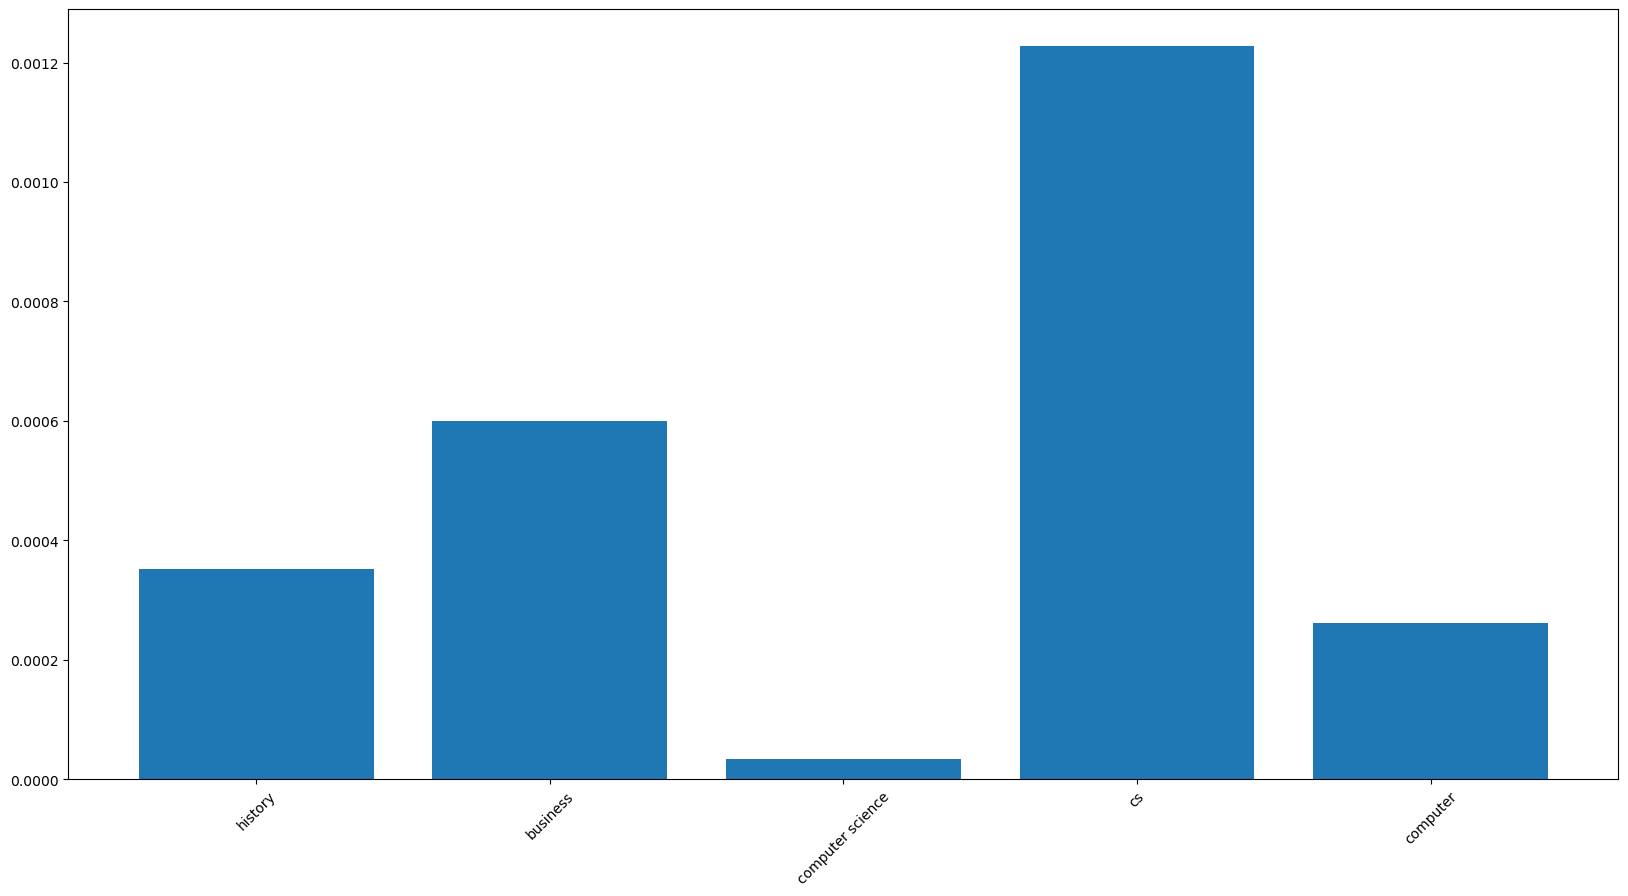

In [23]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [24]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [25]:
plot_list=word_counts[["class", "university", "school", "grade", "professor"]]
plot_list

class         0.006817
university    0.002995
school        0.003802
grade         0.000649
professor     0.001511
dtype: float64

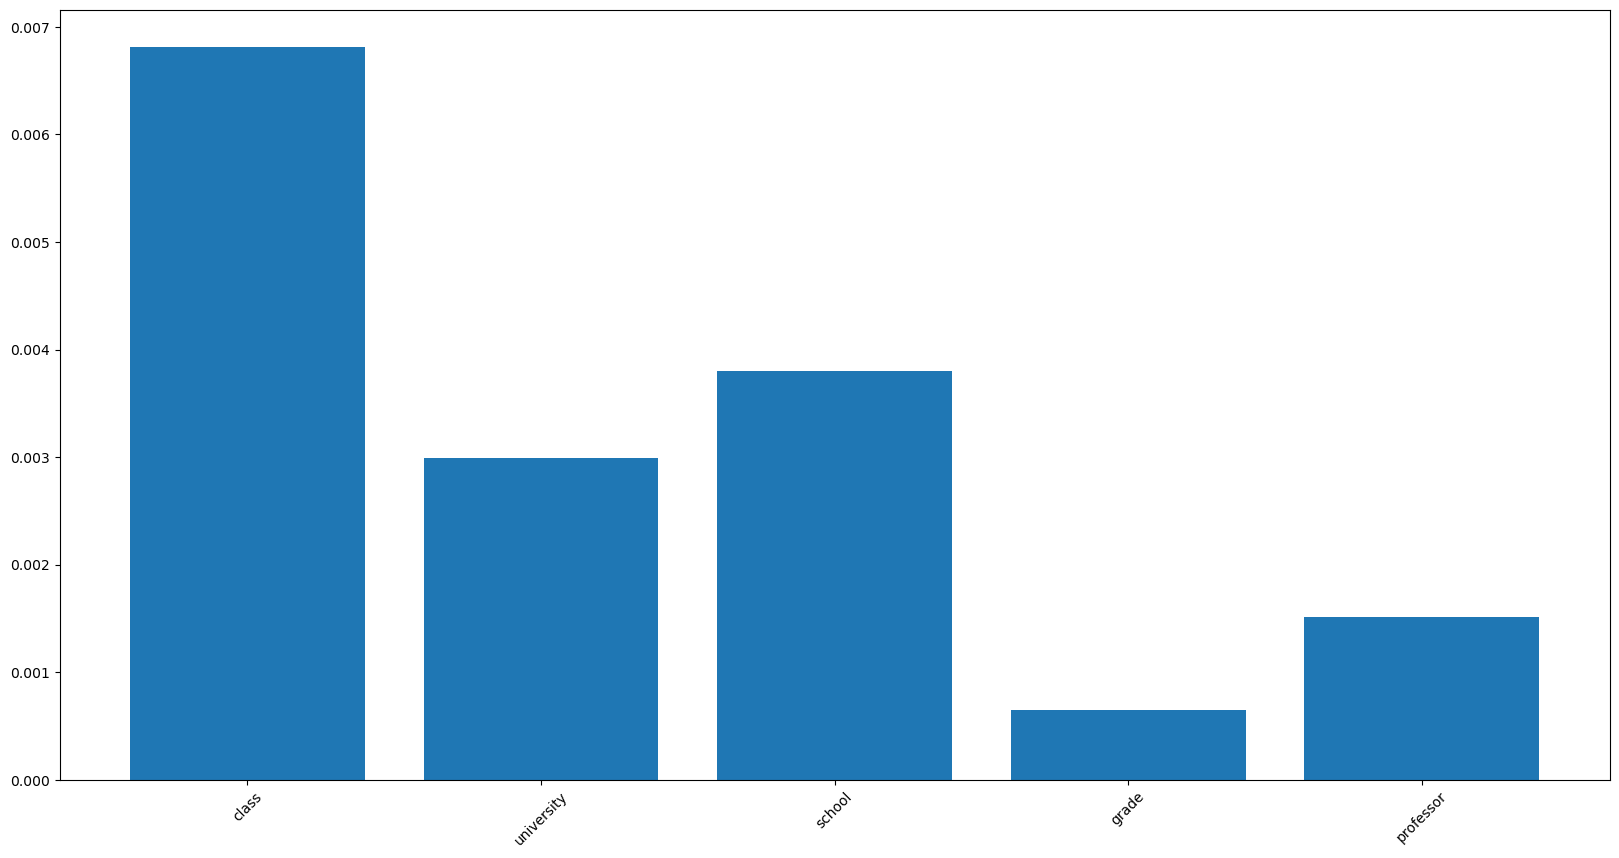

In [26]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [27]:
uiuc=pd.read_csv("uiuc.csv")


In [28]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [29]:
vectorizer2 = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words2 = vectorizer2.fit_transform(uiuc['lemmatized_text'])

In [30]:
bow2_df = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer2.get_feature_names_out())
word_counts2 = bow2_df.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

not          1205
like          534
people        481
good          389
time          376
             ... 
mask sick       3
marville        3
markdown        3
maps            3
luckily         3
Length: 3882, dtype: int64

In [31]:
word_counts2 = word_counts2 / word_counts2.sum()

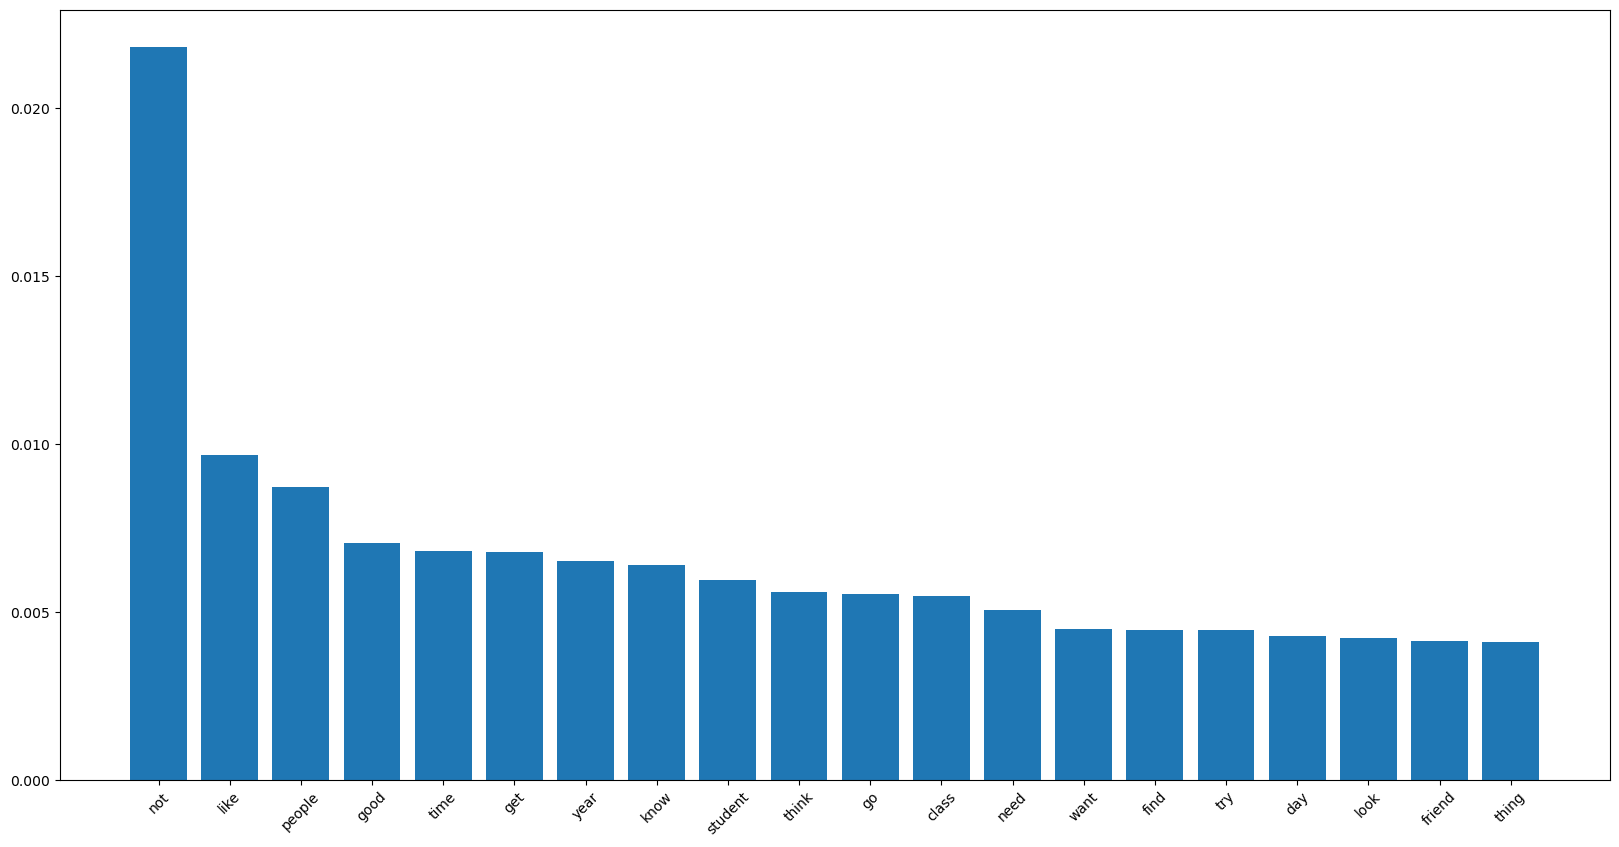

In [32]:
plot_list = word_counts2.head(20)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

Cool.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [35]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)


In [36]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

In [37]:
#train a logistic regression model using the bag of words features as X and the label column as y

logit = LogisticRegression()
logit.fit(bag_of_words, data['label'])


LogisticRegression()

In [38]:
#report the accuracy of the model
from sklearn.metrics import accuracy_score as acc 
acc(data['label'], logit.predict(bag_of_words))

0.8992592592592593

The model has 90% accuracy on the data it was trained on. Pretty good for just counting words, but also probably overestimating the real model accuracy as we measured on the training data, not unseen data.

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data['label'], test_size = 0.2, 
                                                    train_size = 0.8, random_state = 2171963) #Use a very special seed

logit2 = LogisticRegression()
logit2.fit(X_train, y_train)

LogisticRegression()

In [40]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
acc(y_test, logit2.predict(X_test))



0.7158730158730159

The accuracy is considerably worse, about 72.86%. We used less data to train the model, and we tested it on unseen data this time. When you test a model on the training data, it achieves a higher accuracy because it is fit to the specific random noise present in the training data. This can be misleading, since we'd like to use the model to make predictions using new data. The accuracy score on unseen test data gives us a better idea of how the model will perform on this new data, and it will always be lower than the accuracy on training data.

#### Part 3: Examine the top features of your model using the following code

In [41]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [42]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())


coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': logit2.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)


In [43]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
top_10_positive

,feature,coefficient
7737,uiuc,2.539050
6237,rso,2.101067
2926,grainger,1.886944
3361,illinois,1.753150
956,champaign,1.727046
532,basketball,1.722517
3358,illini,1.717089
7856,urbana,1.628502
7695,tuesday,1.539612
1545,danville,1.497443


In [44]:
top_10_negative

,feature,coefficient
1714,diag,-1.562140
6225,ross,-1.582781
7842,uofm,-1.697520
7321,texas,-1.774421
4341,mcard,-1.822027
7744,um,-1.824396
1975,eec,-2.068709
7747,umich,-2.183128
2545,fresno,-2.225397
4428,michigan,-3.006006


### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [45]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [48]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])

corpus = Sparse2Corpus(bag_of_words, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

KeyboardInterrupt: 

In [49]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

#show the topics
lda_model.print_topics()



[(0,
  '0.026*"not" + 0.022*"like" + 0.012*"people" + 0.011*"feel" + 0.010*"day" + 0.009*"week" + 0.008*"go" + 0.008*"time" + 0.008*"thank" + 0.008*"hear"'),
 (1,
  '0.027*"weather" + 0.014*"warning" + 0.013*"tornado" + 0.012*"go" + 0.012*"good" + 0.009*"time" + 0.009*"alert" + 0.008*"siren" + 0.008*"bad" + 0.008*"water"'),
 (2,
  '0.029*"not" + 0.013*"water" + 0.011*"class" + 0.011*"year" + 0.011*"like" + 0.010*"know" + 0.010*"go" + 0.010*"people" + 0.009*"lot" + 0.008*"student"'),
 (3,
  '0.014*"year" + 0.013*"student" + 0.012*"not" + 0.010*"try" + 0.008*"ll" + 0.008*"lol" + 0.008*"pay" + 0.008*"university" + 0.007*"time" + 0.007*"watch"'),
 (4,
  '0.014*"campus" + 0.014*"like" + 0.012*"live" + 0.012*"good" + 0.011*"people" + 0.010*"pipe" + 0.008*"student" + 0.008*"get" + 0.007*"year" + 0.007*"freshman"'),
 (5,
  '0.025*"class" + 0.016*"student" + 0.012*"hour" + 0.011*"campus" + 0.010*"sell" + 0.010*"government" + 0.009*"iclicker" + 0.009*"week" + 0.008*"thing" + 0.008*"crazy"'),
 (6

In [50]:
# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, minimum_probability=0)

# Convert the topic distributions to a DataFrame
topic_df = pd.DataFrame([{topic: prob for topic, prob in doc} for doc in topic_distributions])

# Print out a few comments with high frequencies of each topic
for topic in range(10):
    print(f"Topic {topic}:")
    top_comments = topic_df.sort_values(by=topic, ascending=False).head(3).index
    for idx in top_comments:
        print(f"Comment {idx}: {uiuc['text'].iloc[idx]}")
    print("\n")

Topic 0:
Comment 1508: I remember when I was younger, I went to visit a girl at Northern Illinois University in Dekalb. I parked overnight in a spot that was permit enforced between 6am and 6pm. I overslept like 15 minutes and came out to my car being gone. Fucking impossible to figure out where my car was, and then fucking impossible to get to the tow lot in the middle of Fucking nowhere. 

TLDR;  couldn't get my car, car held for ransom at like $150/day, lost my job, became homeless,  hooked on meth, basketball diaries bathroom stall and all...because I overslept for 15 minutes
Comment 710: Yeah I was there on the third floor when it happened. It was just like a loud BANG and then a girl was screaming bloody murder. Everyone assumed there was a shooter and there was that breif moment in my head like "is this really happening??" You never think its gonna happen to you but then it does (well sorta). I still am so confused about everything and honestly can't wrap my mind around it all. 

0: Schedule check?

1: Classic Illinois Weather - Cornfield edition.

2: Making friends?

3: College finances

4: Prospective Students - Campus Life

5: Sales posts

6: Career fair posts?

7: UIUC vs other universities

8: Prospective Students - RSOs

9: Parking on campus

In [52]:
# Copilot was used for this code: it wasn't really covered in the demo how gensim could be used for something like this (mostly I wasn't sure what the corpus object was) so I asked copilot.

# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, minimum_probability=0)

# Convert the topic distributions to a DataFrame
topic_df = pd.DataFrame([{topic: prob for topic, prob in doc} for doc in topic_distributions])

# Print out a few comments with high frequencies of each topic
for topic in range(10):
    print(f"Topic {topic}:")
    top_comments = topic_df.sort_values(by=topic, ascending=False).head(3).index
    for idx in top_comments:
        print(f"Comment {idx}: {uiuc['text'].iloc[idx]}")
    print("\n")

Topic 0:
Comment 1508: I remember when I was younger, I went to visit a girl at Northern Illinois University in Dekalb. I parked overnight in a spot that was permit enforced between 6am and 6pm. I overslept like 15 minutes and came out to my car being gone. Fucking impossible to figure out where my car was, and then fucking impossible to get to the tow lot in the middle of Fucking nowhere. 

TLDR;  couldn't get my car, car held for ransom at like $150/day, lost my job, became homeless,  hooked on meth, basketball diaries bathroom stall and all...because I overslept for 15 minutes
Comment 710: Yeah I was there on the third floor when it happened. It was just like a loud BANG and then a girl was screaming bloody murder. Everyone assumed there was a shooter and there was that breif moment in my head like "is this really happening??" You never think its gonna happen to you but then it does (well sorta). I still am so confused about everything and honestly can't wrap my mind around it all. 

To be honest, my guesses at the topics weren't very good. It was hard to see how the common words for the topics were related, and a lot of them still had the same words, like "not" and "people," making it hard to differentiate them.